In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
# path_footprints = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_alt/base_collider/xtrack_0000"

# for i in range(100):
#     path = path_footprints + "/footprint_step_" + str(i) + ".npy"
#     footprint = np.load(path)
#     plt.scatter(footprint[0, :], footprint[1, :], label="step " + str(i))
#     plt.grid()
#     plt.show()

In [2]:
path_dics = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000/"
l_bb_elements = []
for step in range(5):
    path = path_dics + f"bb_elements_step_{step}.pkl"
    with open(path, "rb") as f:
        bb_elements = pickle.load(f)
    l_bb_elements.append(bb_elements)

In [70]:
test = l_bb_elements[0]

In [84]:
test['lhcb1']['bb_ho.l5b1_01']

BeamBeamBiGaussian3D(scale_strength=1.0, _sin_phi=0.00013500429617469947, _cos_phi=0.9999999908869199, _tan_phi=0.00013500429740500442, _sin_alpha=-0.00012075221010383088, _cos_alpha=0.9999999927094518, ref_shift_x=-1.40449959030139e-06, ref_shift_px=0.00013500445737881422, ref_shift_y=0.0005499934128752147, ref_shift_py=-1.4108144758158124e-08, ref_shift_zeta=2.751196485309346e-06, ref_shift_pzeta=-4.823282118149308e-08, other_beam_shift_x=2.7995252248767427e-06, other_beam_shift_px=0.0, other_beam_shift_y=-0.0010999910980265897, other_beam_shift_py=0.0, other_beam_shift_zeta=0.0, other_beam_shift_pzeta=0.0, post_subtract_x=-6.776263578034403e-21, post_subtract_px=-1.603452456531637e-11, post_subtract_y=2.3852447794681098e-18, post_subtract_py=6.300293301917222e-09, post_subtract_zeta=0.0, post_subtract_pzeta=-2.220446049250313e-15, other_beam_q0=1.0, num_slices_other_beam=1, slices_other_beam_num_particles=[1.63636364e+10], slices_other_beam_x_center_star=[0.], slices_other_beam_px_c

In [94]:
l_elements_of_interest = [
    "scale_strength",
    "ref_shift_x",
    "ref_shift_y",
    "other_beam_shift_x",
    "other_beam_shift_y",
    "post_subtract_px",
    "post_subtract_py",
    "other_beam_q0",
    "other_beam_beta0",
    "other_beam_num_particles",
    "other_beam_Sigma_11",
    "other_beam_Sigma_13",
    "other_beam_Sigma_33",
    "min_sigma_diff",
]

# Let's look how LR elements of IP5 are changing
lll_val = [[],[]]
l_element_names = ["bb_lr.l5b1_01", "bb_lr.l5b2_01"]
l_beams = ["lhcb1", "lhcb2"] 
for d_bb_elements in l_bb_elements:
    for ll_val, beam, element_name in zip(lll_val, l_beams, l_element_names):
        l_val = []
        for x in l_elements_of_interest:
            val = getattr(d_bb_elements[beam][element_name],x)
            if type(val) in [float, int, np.float64, np.int64]:
                l_val.append(val)
            elif type(val) == np.ndarray or type(val) == list:
                l_val.append(val[0])
            else:
                print(type(val))
                raise ValueError("Unknown type")
        ll_val.append(l_val)

ll_val_b1, ll_val_b2 = lll_val

   


In [95]:
# Convert all lists to numpy arrays
ll_val_b1 = np.array(ll_val_b1).T
ll_val_b2 = np.array(ll_val_b2).T
l_elements_of_interest = np.array(l_elements_of_interest)

# Only keep elements whose value is changing (should be the same for both beams)
l_elements_of_interest = l_elements_of_interest[ll_val_b1.std(axis=1) >= 1e-8]
ll_val_b1 = ll_val_b1[ll_val_b1.std(axis=1) >= 1e-8]
ll_val_b2 = ll_val_b2[ll_val_b2.std(axis=1) >= 1e-8]


In [96]:
on_sep1

array([0.55  , 0.4125, 0.275 , 0.1375, 0.    ])

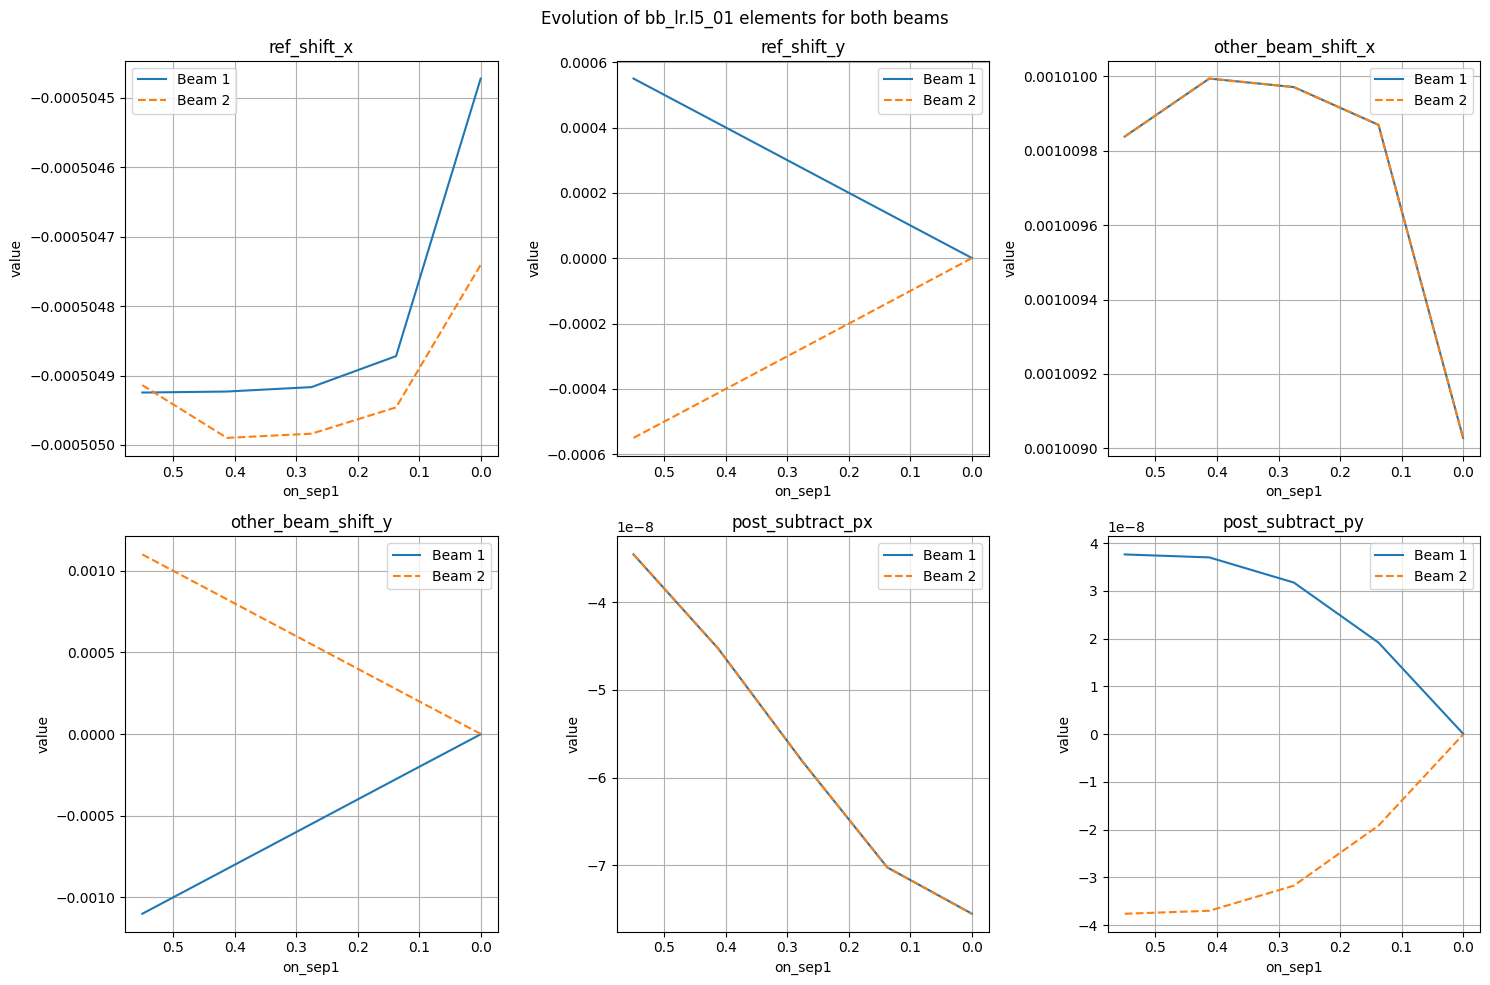

In [97]:
# plt.plot(list(range(len(ll_val))), np.array(ll_val))
# plt.legend(l_elements_of_interest)
# plt.show()

# Define x-axis
on_sep1 = np.linspace(0.55,0,5, endpoint=True)
#on_sep1 = list(range(5))
# Make a plot for each element (6 elements in total, 3*3 subplots)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, element in enumerate(l_elements_of_interest):
    axs[i//3, i%3].plot(on_sep1, ll_val_b1[i], label='Beam 1')
    axs[i//3, i%3].plot(on_sep1, ll_val_b2[i], '--', label='Beam 2', )
    axs[i//3, i%3].legend()
    axs[i//3, i%3].grid()
    axs[i//3, i%3].set_xlabel("on_sep1")
    axs[i//3, i%3].invert_xaxis()
    axs[i//3, i%3].set_ylabel("value")
    axs[i//3, i%3].set_title(element)

plt.suptitle("Evolution of bb_lr.l5_01 elements for both beams")
plt.tight_layout()
plt.show()


In [99]:
l_elements_of_interest = [
    "scale_strength",
    "_sin_phi",
    "_cos_phi",
    "_tan_phi",
    "_sin_alpha",
    "_cos_alpha",
    "ref_shift_x",
    "ref_shift_px",
    "ref_shift_y",
    "ref_shift_py",
    "ref_shift_zeta",
    "ref_shift_pzeta",
    "other_beam_shift_x",
    "other_beam_shift_px",
    "other_beam_shift_y",
    "other_beam_shift_py",
    "other_beam_shift_zeta",
    "other_beam_shift_pzeta",
    "post_subtract_x",
    "post_subtract_px",
    "post_subtract_y",
    "post_subtract_py",
    "post_subtract_zeta",
    "post_subtract_pzeta",
    "other_beam_q0",
    "num_slices_other_beam",
    "slices_other_beam_num_particles",
    "slices_other_beam_x_center_star",
    "slices_other_beam_px_center_star",
    "slices_other_beam_y_center_star",
    "slices_other_beam_py_center_star",
    "slices_other_beam_zeta_center_star",
    "slices_other_beam_pzeta_center_star",
    "slices_other_beam_Sigma_11_star",
    "slices_other_beam_Sigma_12_star",
    "slices_other_beam_Sigma_13_star",
    "slices_other_beam_Sigma_14_star",
    "slices_other_beam_Sigma_22_star",
    "slices_other_beam_Sigma_23_star",
    "slices_other_beam_Sigma_24_star",
    "slices_other_beam_Sigma_33_star",
    "slices_other_beam_Sigma_34_star",
    "slices_other_beam_Sigma_44_star",
]


# Let's look how HO elements of IP5 are changing
lll_val = [[], []]
l_element_names = ["bb_ho.l5b1_01", "bb_ho.l5b2_01"]
l_beams = ["lhcb1", "lhcb2"]
for d_bb_elements in l_bb_elements:
    for ll_val, beam, element_name in zip(lll_val, l_beams, l_element_names):
        l_val = []
        for x in l_elements_of_interest:
            val = getattr(d_bb_elements[beam][element_name], x)
            if type(val) in [float, int, np.float64, np.int64]:
                l_val.append(val)
            elif type(val) == np.ndarray or type(val) == list:
                l_val.append(val[0])
            else:
                print(type(val))
                raise ValueError("Unknown type")
        ll_val.append(l_val)

ll_val_b1, ll_val_b2 = lll_val

# Convert all lists to numpy arrays
ll_val_b1 = np.array(ll_val_b1).T
ll_val_b2 = np.array(ll_val_b2).T
l_elements_of_interest = np.array(l_elements_of_interest)

# Only keep elements whose value is changing (should be the same for both beams)
l_elements_of_interest = l_elements_of_interest[ll_val_b1.std(axis=1) >= 1e-8]
ll_val_b1 = ll_val_b1[ll_val_b1.std(axis=1) >= 1e-8]
ll_val_b2 = ll_val_b2[ll_val_b2.std(axis=1) >= 1e-8]

In [101]:
ll_val_b2.shape

(12, 5)

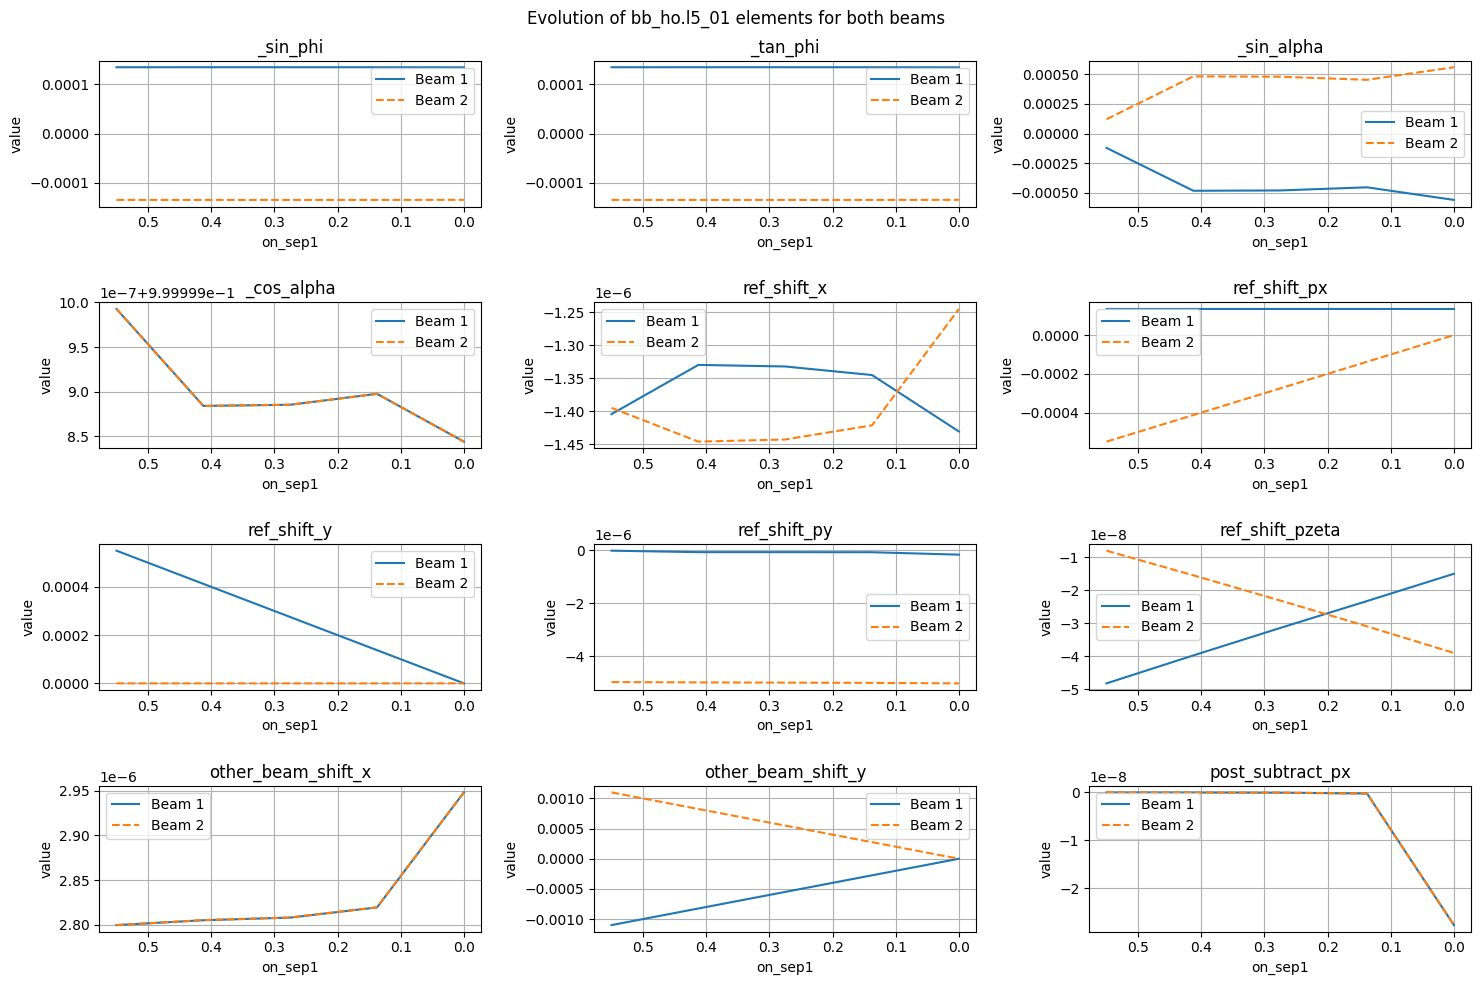

In [102]:
# Make a plot for each element (12 elements in total, 4*3 subplots)
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
for i, element in enumerate(l_elements_of_interest):
    axs[i // 3, i % 3].plot(on_sep1, ll_val_b1[i], label="Beam 1")
    axs[i // 3, i % 3].plot(on_sep1, ll_val_b2[i], "--", label="Beam 2", )
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].grid()
    axs[i // 3, i % 3].set_xlabel("on_sep1")
    axs[i // 3, i % 3].invert_xaxis()
    axs[i // 3, i % 3].set_ylabel("value")
    axs[i // 3, i % 3].set_title(element)


plt.suptitle("Evolution of bb_ho.l5_01 elements for both beams")
plt.tight_layout()
plt.show()